In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download("stopwords")
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
def load_dataset(filepath,cols):
  df=pd.read_csv(filepath,encoding="latin-1")
  df.columns=cols
  return df
df=load_dataset(r'/content/drive/MyDrive/Downloads/twitter_new.csv',cols=['target', 'ids', 'date', 'flag', 'user','text'])


In [ ]:
def delete_redundant_cols(df,cols):
  for col in cols:
    del df[col]
  return df
delete_redundant_cols(df,cols=['ids','date','flag','user'])

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
def preprocess_tweet_text(tweet):
  tweet=tweet.lower()
  tweet=re.sub(r"https\S+|www\S+https\S+","",tweet,flags=re.MULTILINE)
  tweet=re.sub(r"\@\w+|\#","",tweet)
  tweet = re.sub(r'[^\w\s]','',tweet)
  text_tokens=word_tokenize(tweet)
  filtered_word=[w for w in text_tokens if w not in stop_words]
  return " ".join(filtered_word)

In [ ]:
df.text=df["text"].apply(preprocess_tweet_text)

In [ ]:
df=df.drop_duplicates("text")

In [ ]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [ ]:
df["text"]=df["text"].apply(lambda x: stemming(x))

<ipython-input-16-7992bc105169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]=df["text"].apply(lambda x: stemming(x))


In [ ]:
df.head()

,target,text
0,0,upset cant update facebook texting might cry r...
1,0,dived many times ball managed save 50 rest go ...
2,0,whole body feels itchy like fire
3,0,behaving im mad cant see
4,0,whole crew


In [ ]:
print(df["text"].iloc[0],"\n")
print(df["text"].iloc[1],"\n")
print(df["text"].iloc[2],"\n")
print(df["text"].iloc[34],"\n")

upset cant update facebook texting might cry result school today also blah 

dived many times ball managed save 50 rest go bounds 

whole body feels itchy like fire 

ok im sick spent hour sitting shower cause sick stand held back puke like champ bed 



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491712 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1491712 non-null  int64 
 1   text    1491712 non-null  object
dtypes: int64(1), object(1)
memory usage: 34.1+ MB


# Given in the project so considering it as it is

In [ ]:
def sentiment(label):
  if label==0:
    return "Negative"
  elif label==2:
    return "Neutral"
  elif label==4:
    return "Positive"





In [ ]:
df["sentiment"]=df["target"].apply(sentiment)

<ipython-input-21-66c7efaee252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"]=df["target"].apply(sentiment)


In [ ]:
df

,target,text,sentiment
0,0,upset cant update facebook texting might cry r...,Negative
1,0,dived many times ball managed save 50 rest go ...,Negative
2,0,whole body feels itchy like fire,Negative
3,0,behaving im mad cant see,Negative
4,0,whole crew,Negative
...,...,...,...
1599994,4,woke school best feeling ever,Positive
1599995,4,thewdbcom cool hear old walt interviews â http...,Positive
1599996,4,ready mojo makeover ask details,Positive
1599997,4,happy 38th birthday boo alll time tupac amaru ...,Positive


# only positive and negative polarity is there in the dataset

<Axes: xlabel='sentiment', ylabel='count'>

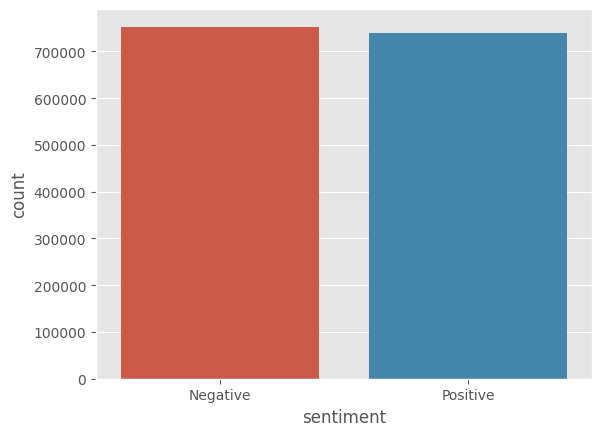

In [ ]:
sns.countplot(x="sentiment",data=df)

In [ ]:
pos_tweets=df[df.sentiment=="Positive"]
pos_tweets=pos_tweets.sort_values(["target"],ascending=False)
pos_tweets.head()

,target,text,sentiment
799999,4,love u guys r best,Positive
1330997,4,well done declan im 62 avid tweeter,Positive
1330999,4,spending whole day home mom,Positive
1331000,4,morning calm nasty storm last night howre,Positive
1331001,4,getting ready work going relax rest day,Positive


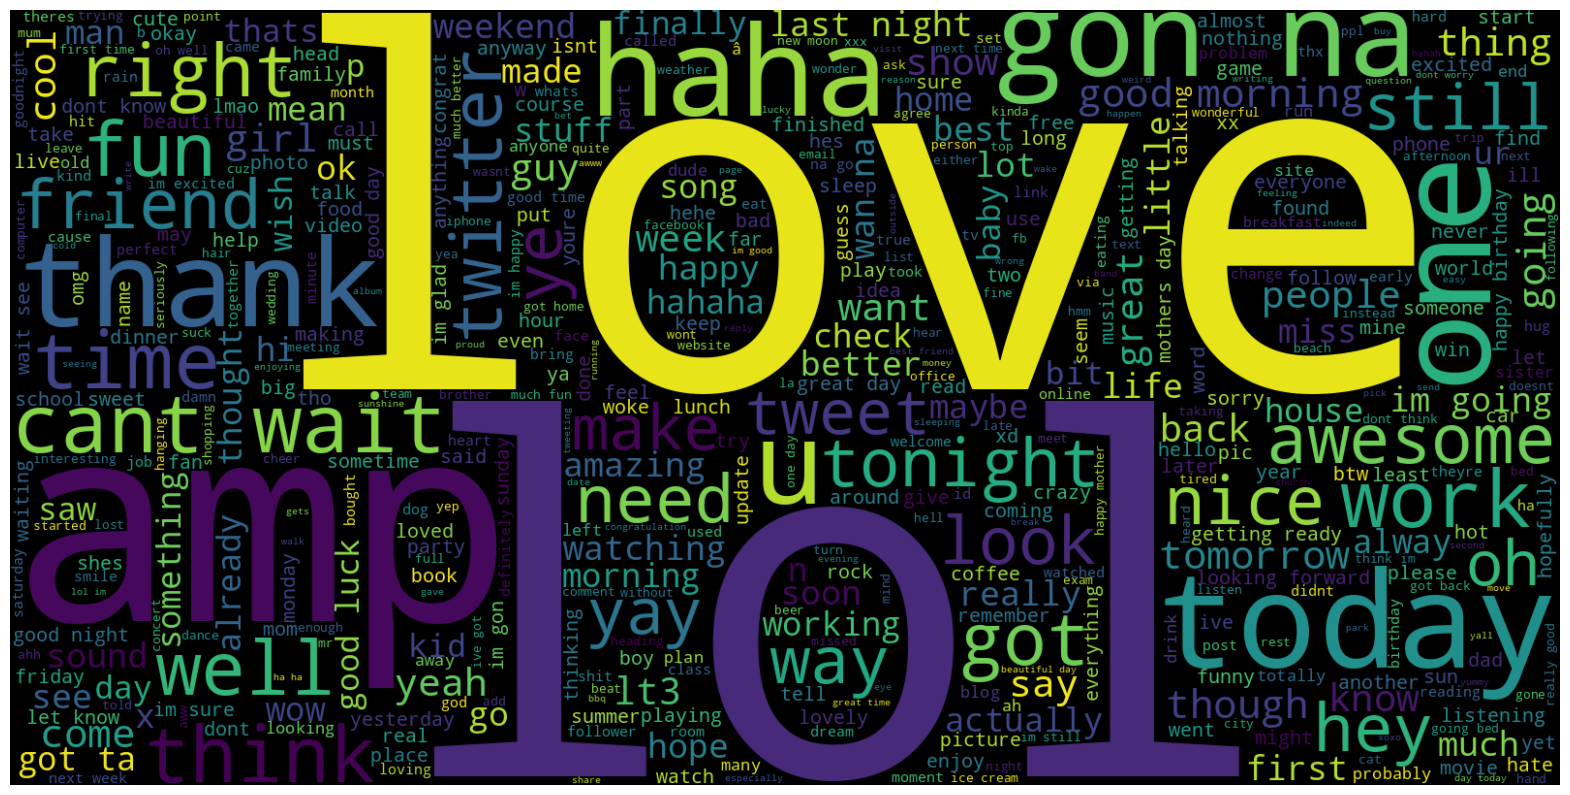

In [ ]:
text=" ".join([word for word in pos_tweets["text"]])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
neg_tweets=df[df.sentiment=="Negative"]
neg_tweets=neg_tweets.sort_values(["target"],ascending=False)
neg_tweets.head()

,target,text,sentiment
0,0,upset cant update facebook texting might cry r...,Negative
531224,0,need someone help monthly newslettertotally lo...,Negative
531226,0,boooooo shediac,Negative
531227,0,bet many people say gave nasty bleeding cut sc...,Negative
531228,0,myspace gurrd whyy doesnnt anyone use itt,Negative


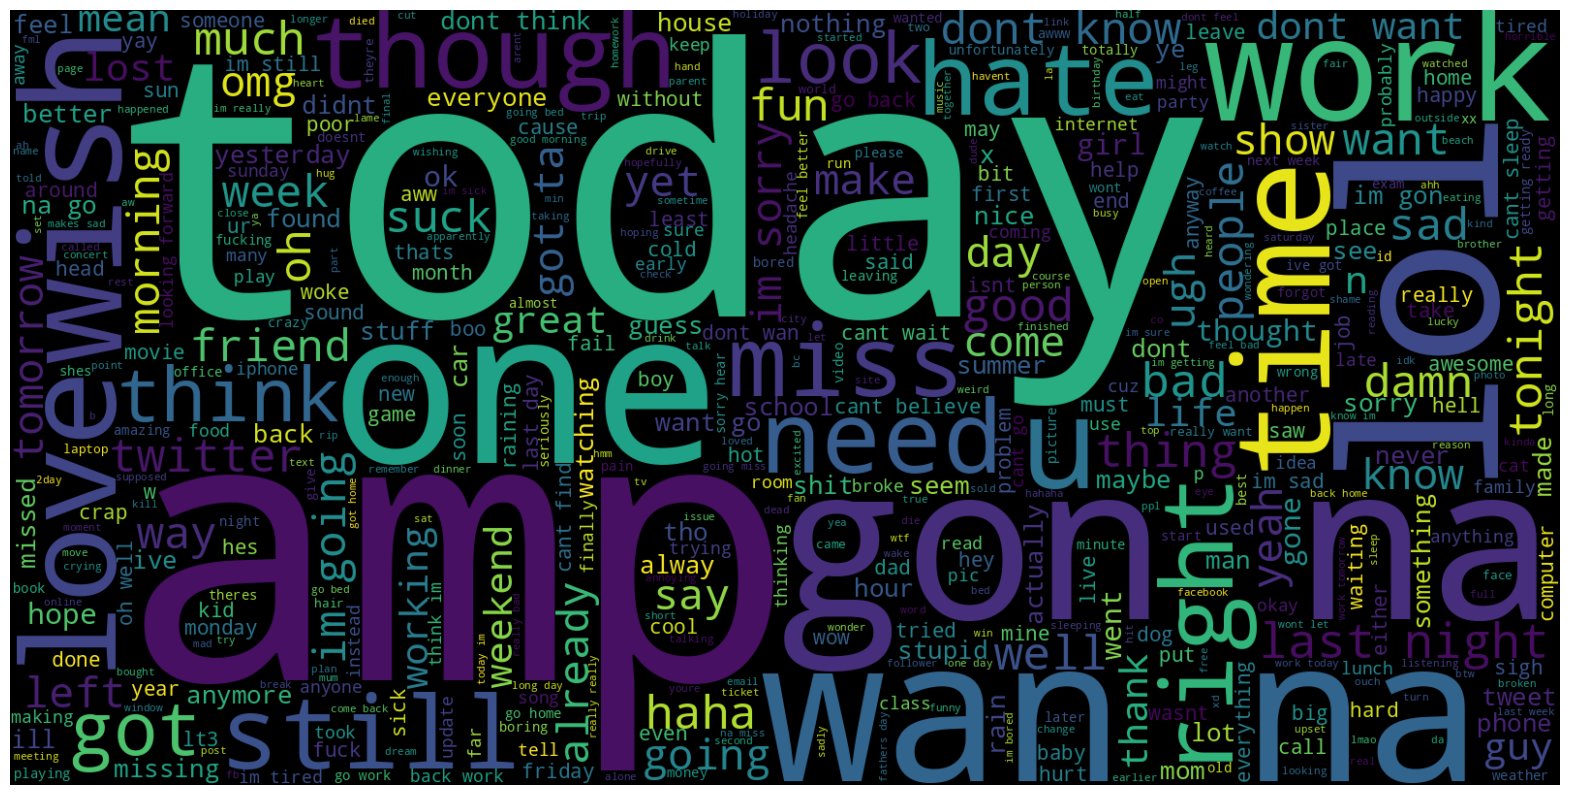

In [ ]:
text=" ".join([word for word in neg_tweets["text"]])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
neutral_tweets=df[df.sentiment=="Neutral"]
neutral_tweets=neutral_tweets.sort_values(["target"],ascending=False)
neutral_tweets.head()

,target,text,sentiment


**Extracting Feature from text by applying Count Vectorization**

In [ ]:
count_vect=CountVectorizer()
feature=count_vect.fit_transform(df["text"])

**Splitting the data into training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(feature,df["target"],random_state=42,test_size=0.20)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(1193369, 514932)
(1193369,)
(298343, 514932)
(298343,)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Fitting Logistic Regression Model**

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc=accuracy_score(pred,y_test)
print(acc)

0.7790931913937984


In [ ]:
print(confusion_matrix(pred,y_test))
print(classification_report(y_test,pred))

[[114407  29936]
 [ 35970 118030]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    150377
           4       0.77      0.80      0.78    147966

    accuracy                           0.78    298343
   macro avg       0.78      0.78      0.78    298343
weighted avg       0.78      0.78      0.78    298343



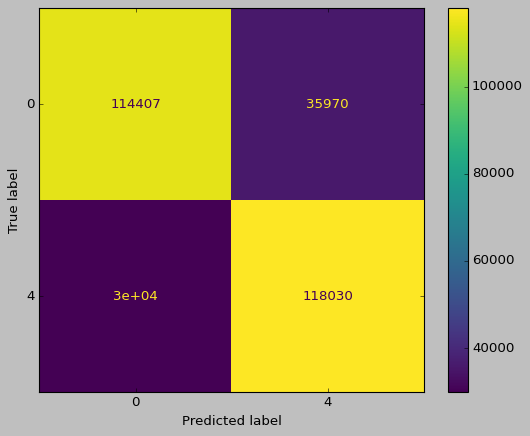

In [ ]:
style.use("classic")
cm=confusion_matrix(y_test,pred,labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)
print("best parameter:",grid.best_params_)

best parameter: {'C': 0.1}


In [ ]:
y_pred=grid.predict(X_test)
lr_acc=accuracy_score(y_pred,y_test)
print("Accuracy Score for LR MOdel:",lr_acc)

Accuracy Score for LR MOdel: 0.7800183010829816


**Fitting SVM Model**

In [ ]:
from sklearn.svm import LinearSVC
svcmodel=LinearSVC()
svcmodel.fit(X_train,y_train)
svcpred=svcmodel.predict(X_test)
acc=accuracy_score(svcpred,y_test)
print(acc)

0.7695806504593706


In [ ]:
print(confusion_matrix(svcpred,y_test))
print(classification_report(y_test,svcpred))

[[114098  32465]
 [ 36279 115501]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    150377
           4       0.76      0.78      0.77    147966

    accuracy                           0.77    298343
   macro avg       0.77      0.77      0.77    298343
weighted avg       0.77      0.77      0.77    298343



**Model Prediction**


1. LR - 77.90%
2. tuned LR -  78.00%
3. SVM - 76.95%



